In [3]:
# import libraries to use (pandas, matplotlib.pyplot and seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

%matplotlib inline

### Get the numeric data into dataframe

Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
 

In [4]:
# Import data from Data folder and create a data frame named "data"
data = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')

**! No need to run cell below** - except for check of data types

In [5]:
# Check data types of columns
data.dtypes

region                           object
customer_lifetime_value           int64
response                         object
coverage                         object
education                        object
effective_to_date                object
month                            object
employment_status                object
gender                           object
income                            int64
location_code                    object
marital_status                   object
monthly_premium_auto              int64
months_since_last_claim           int64
months_since_policy_inception     int64
number_of_open_complaints         int64
number_of_policies                int64
policy_type                      object
policy                           object
renew_offer_type                 object
sales_channel                    object
total_claim_amount                int64
vehicle_class                    object
vehicle_size                     object
dtype: object

In [6]:
# Create data frame: "numerical" contains all the number columns
numerical = data.select_dtypes(np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [7]:
# Create data frame: "categoricals" saves everything but numerical

categoricals = data.select_dtypes(exclude = np.number)
categoricals

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


### Check the normality of the numerical variables visually

Use seaborn library to construct distribution plots for the numerical variables

In [8]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


### Construct histograms

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

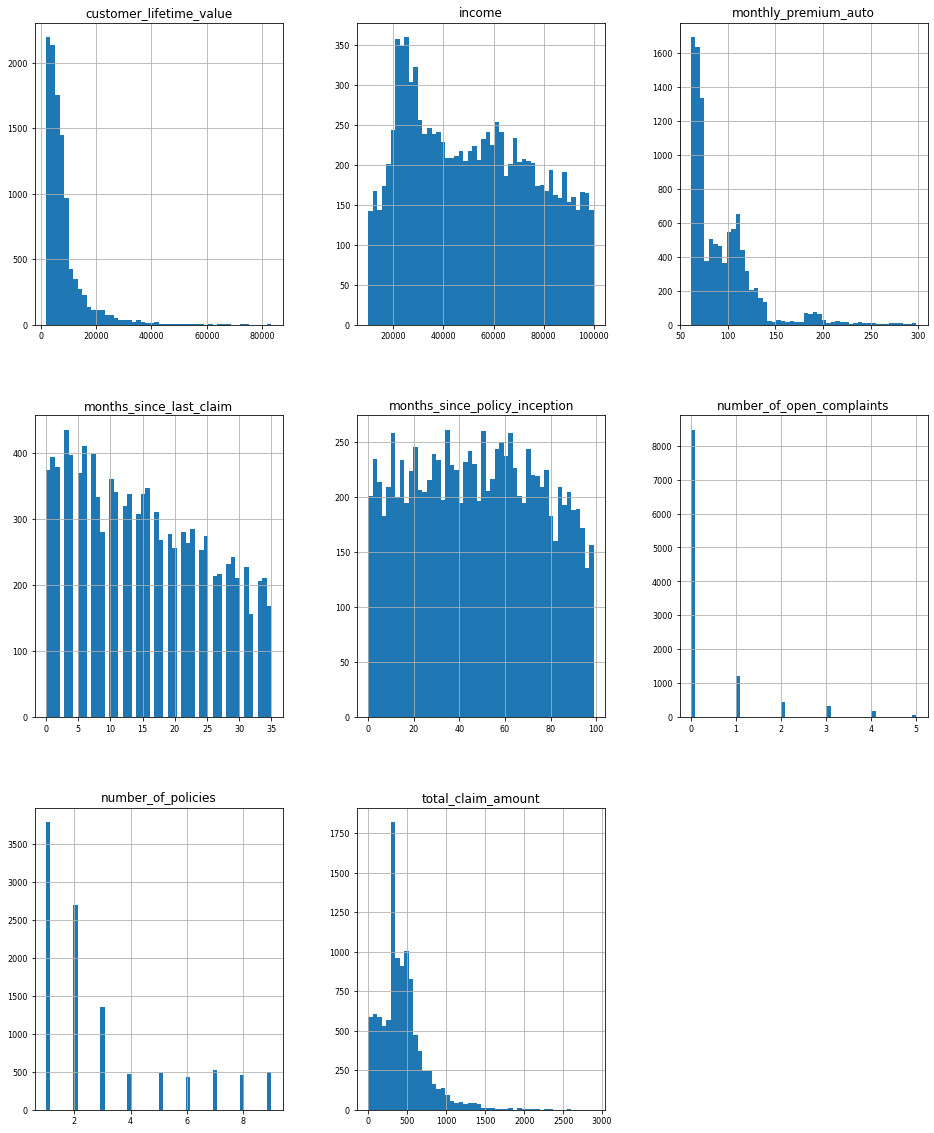

In [9]:
numerical.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

In [10]:
list(numerical.columns)

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [11]:
#sns.pairplot(numerical)
numerical_columns = list(numerical.columns)

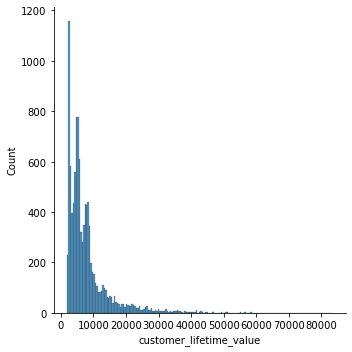

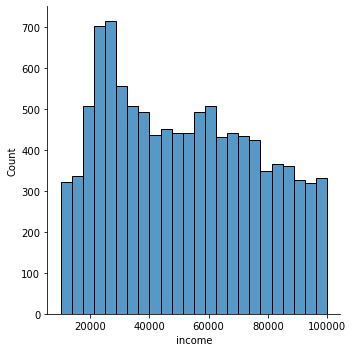

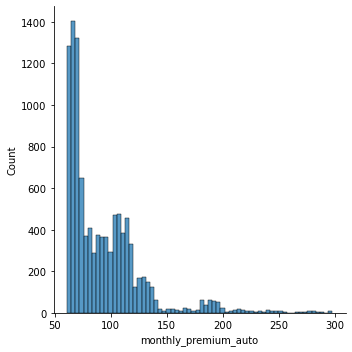

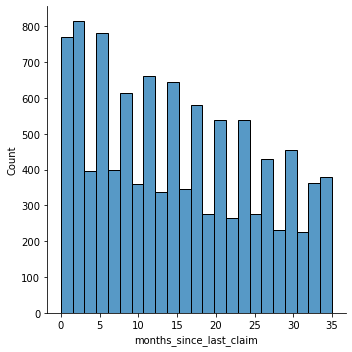

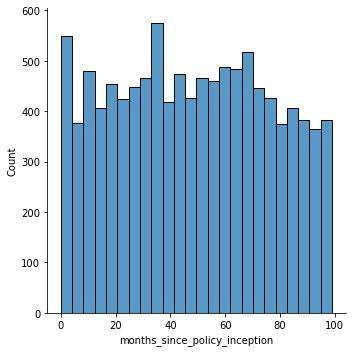

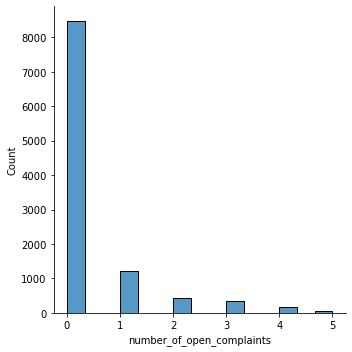

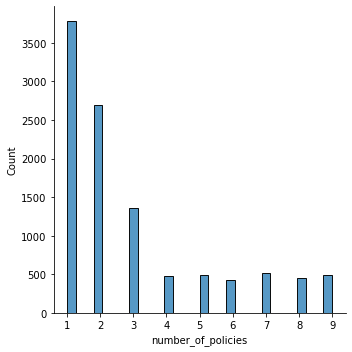

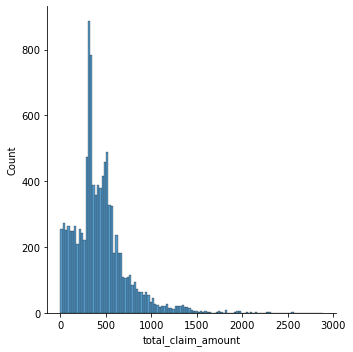

In [12]:
for it in (numerical_columns):
#    sns.displot(numerical["income"])
    sns.displot(numerical[it])

count    10689.000000
mean      8011.906727
std       6877.557889
min       1898.000000
25%       4014.000000
50%       5776.000000
75%       8991.000000
max      83325.000000
Name: customer_lifetime_value, dtype: float64


/Users/marlena/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


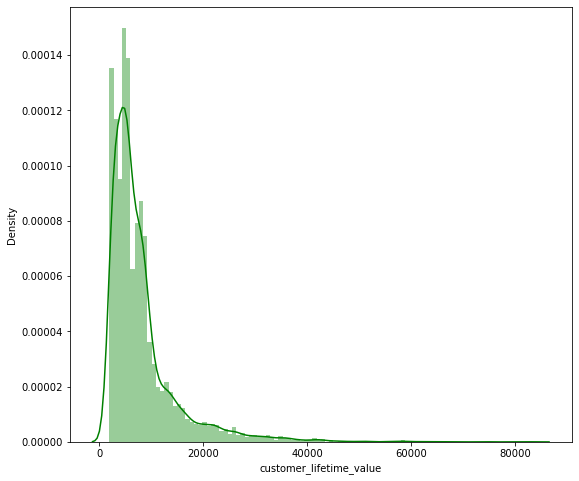

In [13]:
print(numerical['customer_lifetime_value'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(numerical['customer_lifetime_value'], color='g', bins=100, hist_kws={'alpha': 0.4});

### Transformation into normal distribution
 
The distributions with the highest similarity to a normal are transformed:

- Customer lifetime value
- Total claim amount

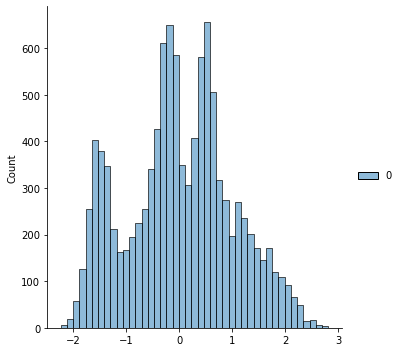

In [14]:
pt = PowerTransformer()
lifetime_value_transformed=pt.fit_transform(numerical['customer_lifetime_value'].to_numpy().reshape(-1,1))
sns.displot(lifetime_value_transformed)

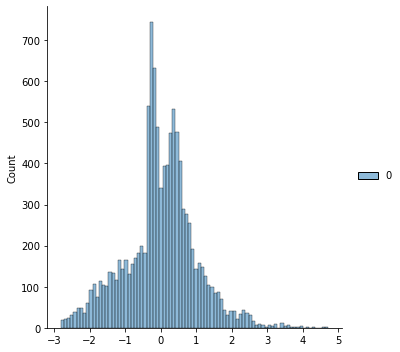

In [15]:
pt = PowerTransformer()
claim_amount_transformed=pt.fit_transform(numerical['total_claim_amount'].to_numpy().reshape(-1,1))
sns.displot(claim_amount_transformed)

### Determine numerical correlation between features

The calculation of the correlation between features can be done simply using the correlation function:


In [16]:
numerical.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


### Correlation heatmap

In order to determine the existence of higher correlations in a quicker manner, a heatmap is provided:

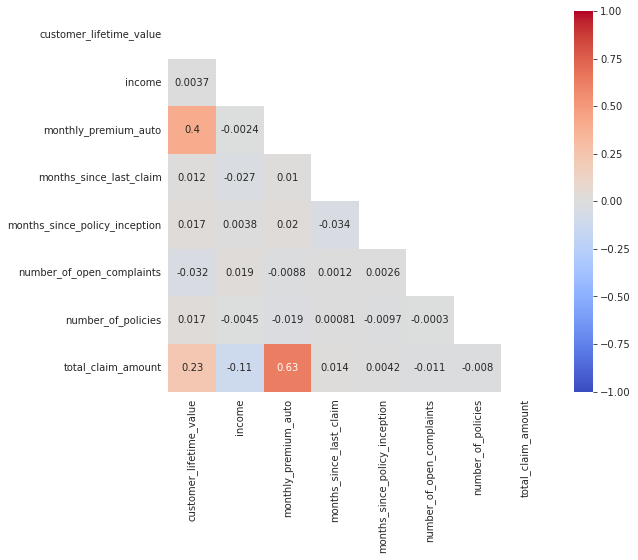

In [17]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### Drop features with correlation higher than 0.9

Select which feature should be removed from the set of highly correlated features:


**No correlation is higher than 0.9, hence there is no need to drop any.**

If there were, rather than dropping all features at once, the following steps would be considered:

- Calculation of the Variance Inflation Factor (VIF)
- Discard feature with highest VIF (preferrably VIF > 5)
- Calculate correlation factor again

In [18]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = numerical[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [19]:
# features to consider removing
considered_features = ['monthly_premium_auto', 'customer_lifetime_value', 'total_claim_amount']


# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

/var/folders/8f/tmg8vtq91173zzcjhk5pbsdh0000gn/T/ipykernel_11221/2262381399.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
0,monthly_premium_auto,1.876868
2,total_claim_amount,1.660190
1,customer_lifetime_value,1.196458


# Day 4 

### Plot of the total number of responses.

In [20]:
responses = categoricals['response'].value_counts()
responses

no     9316
yes    1373
Name: response, dtype: int64

Text(0, 0.5, 'Amount of responses')

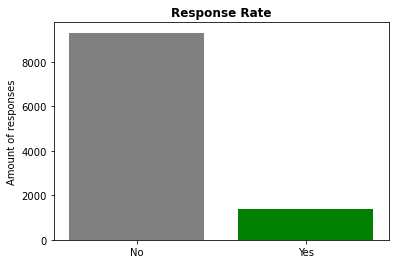

In [23]:
# Create figure and axes
plt.bar(responses.index, responses, color=('grey','green'))
# set title
plt.title('Response Rate', fontweight='bold')
plt.xticks(ticks=[0,1],labels=["No","Yes"])
plt.ylabel("Amount of responses")



In [28]:
sales_channel = categoricals['sales_channel'].value_counts()
sales_channel

agent          4019
branch         2975
call center    2099
web            1596
Name: sales_channel, dtype: int64

<BarContainer object of 3 artists>

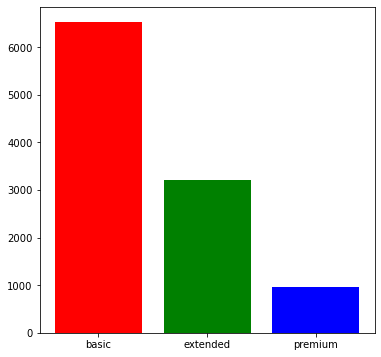

In [25]:
fig3, ax3 = plt.subplots(figsize = (6,6))
ax3.bar(coverage.index,coverage,color=("red","green","blue"))

In [44]:
sales_ch_response = categoricals.groupby(['sales_channel', 'response'])['response'].count().rename('count').reset_index()
sales_channel_agent = sales_ch_response[sales_ch_response['sales_channel']=='agent']
sales_channel_branch = sales_ch_response[sales_ch_response['sales_channel']=='branch']
sales_channel_call_center = sales_ch_response[sales_ch_response['sales_channel']=='call center']
sales_channel_web = sales_ch_response[sales_ch_response['sales_channel']=='web']



In [45]:
sales_ch_response

,sales_channel,response,count
0,agent,no,3340
1,agent,yes,679
2,branch,no,2665
3,branch,yes,310
4,call center,no,1890
5,call center,yes,209
6,web,no,1421
7,web,yes,175


Text(0.5, 1.0, 'Web')

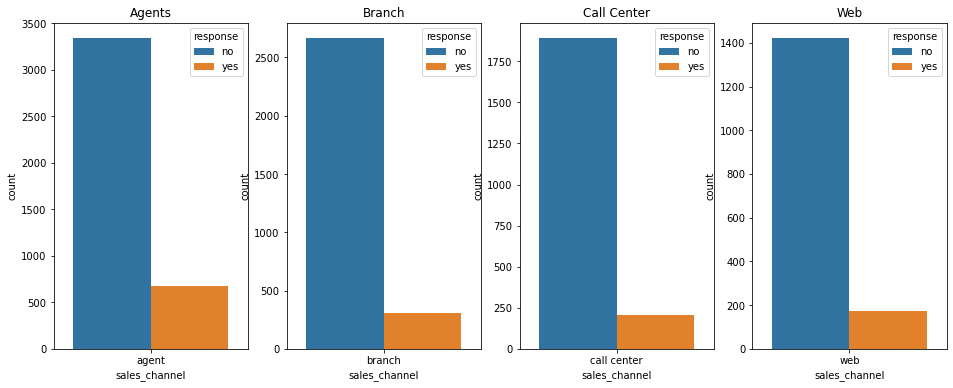

In [59]:
fig5, axes5 = plt.subplots(1,4,figsize=(16,6))

#sns.barplot(x=gender_class_males['class'], y=gender_class_males['count'], hue = 'alive',  ax = axes5[0], palette=palette_alive)
sns.barplot(x='sales_channel', y='count', hue = 'response', data = sales_channel_agent, ax = axes5[0])
axes5[0].set_title('Agents')
sns.barplot(x='sales_channel', y='count', hue = 'response', data = sales_channel_branch, ax = axes5[1])
axes5[1].set_title('Branch')
sns.barplot(x='sales_channel', y='count', hue = 'response', data = sales_channel_call_center, ax = axes5[2])
axes5[2].set_title('Call Center')
sns.barplot(x='sales_channel', y='count', hue = 'response', data = sales_channel_web, ax = axes5[3])
axes5[3].set_title('Web')